# Installation et Importation des librairies

In [1]:
import os
from google.colab import drive
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
os.chdir("/content/drive/My Drive/Observation")

In [4]:
df = pd.read_csv("dataset.csv", sep='\t', header=0, index_col=None)
df.head()

,text,label
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados
3,"Ouais, je comprends...",ados
4,Folle de toi...,ados


# Analyse exploratoire du dataset

In [5]:
df.describe()

,text,label
count,10000,10000
unique,9993,2
top,Personne ????,ados
freq,2,5000


In [6]:
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
df['nbre_words'] = df['text'].apply(lambda x: len(x.split()))
df['nb_phrase'] =df['text'].apply(lambda x: len(x.split('. ')))
df['nb_caractere'] = df['text'].apply(lambda x: len(x) - len(x.split())- len(x.split('.')))
df.head()

,text,label,nbre_words,nb_phrase,nb_caractere
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207
3,"Ouais, je comprends...",ados,3,1,15
4,Folle de toi...,ados,3,1,8


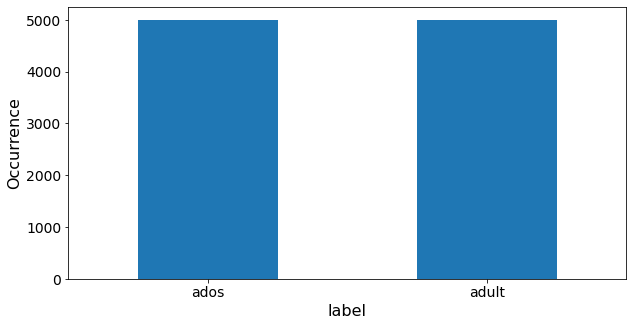

In [8]:
plt.figure(figsize=(10,5))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('label', fontsize=16)
plt.ylabel('Occurrence', fontsize=16)
plt.show()

##Tokenization, stemming et stop words

In [9]:
df['text_clean'] = df['text'].copy()
df['text_clean'] = df['text_clean'].map(lambda x : re.sub('[,\.!?()"^^:;/’]', '', x))
df['text_clean'] = df['text_clean'].map(lambda x : re.sub('\d', '', x))
df.head()

,text,label,nbre_words,nb_phrase,nb_caractere,text_clean
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086,Salut \n\nAlors effectivement cest un pavé mai...
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678,Bonjour\nJe ne suis pas maman solo mais qui su...
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207,Ho mon dieu il met des D Je te souhaite de ...
3,"Ouais, je comprends...",ados,3,1,15,Ouais je comprends
4,Folle de toi...,ados,3,1,8,Folle de toi


In [10]:
df['tokens'] = df['text_clean'].apply(lambda x: word_tokenize(x))
df.head()

,text,label,nbre_words,nb_phrase,nb_caractere,text_clean,tokens
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086,Salut \n\nAlors effectivement cest un pavé mai...,"[Salut, Alors, effectivement, cest, un, pavé, ..."
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678,Bonjour\nJe ne suis pas maman solo mais qui su...,"[Bonjour, Je, ne, suis, pas, maman, solo, mais..."
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207,Ho mon dieu il met des D Je te souhaite de ...,"[Ho, mon, dieu, il, met, des, D, Je, te, souha..."
3,"Ouais, je comprends...",ados,3,1,15,Ouais je comprends,"[Ouais, je, comprends]"
4,Folle de toi...,ados,3,1,8,Folle de toi,"[Folle, de, toi]"


In [11]:
french_stopwords = stopwords.words('french')
df['stop_words'] = df['tokens'].apply(lambda x:[item for item in x if item not in french_stopwords])
df.head()

,text,label,nbre_words,nb_phrase,nb_caractere,text_clean,tokens,stop_words
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086,Salut \n\nAlors effectivement cest un pavé mai...,"[Salut, Alors, effectivement, cest, un, pavé, ...","[Salut, Alors, effectivement, cest, pavé, pens..."
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678,Bonjour\nJe ne suis pas maman solo mais qui su...,"[Bonjour, Je, ne, suis, pas, maman, solo, mais...","[Bonjour, Je, maman, solo, suis-je, juger, Tu,..."
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207,Ho mon dieu il met des D Je te souhaite de ...,"[Ho, mon, dieu, il, met, des, D, Je, te, souha...","[Ho, dieu, met, D, Je, souhaite, brûler, enfer..."
3,"Ouais, je comprends...",ados,3,1,15,Ouais je comprends,"[Ouais, je, comprends]","[Ouais, comprends]"
4,Folle de toi...,ados,3,1,8,Folle de toi,"[Folle, de, toi]",[Folle]


In [12]:
snow_stemmer = SnowballStemmer(language='french')
df['stemm'] = df['stop_words'].apply(lambda x:[snow_stemmer.stem(item) for item in x])
df.head()

,text,label,nbre_words,nb_phrase,nb_caractere,text_clean,tokens,stop_words,stemm
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086,Salut \n\nAlors effectivement cest un pavé mai...,"[Salut, Alors, effectivement, cest, un, pavé, ...","[Salut, Alors, effectivement, cest, pavé, pens...","[salut, alor, effect, cest, pav, pens, besoin,..."
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678,Bonjour\nJe ne suis pas maman solo mais qui su...,"[Bonjour, Je, ne, suis, pas, maman, solo, mais...","[Bonjour, Je, maman, solo, suis-je, juger, Tu,...","[bonjour, je, maman, solo, suis-j, jug, tu, t'..."
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207,Ho mon dieu il met des D Je te souhaite de ...,"[Ho, mon, dieu, il, met, des, D, Je, te, souha...","[Ho, dieu, met, D, Je, souhaite, brûler, enfer...","[ho, dieu, met, d, je, souhait, brûl, enfer, h..."
3,"Ouais, je comprends...",ados,3,1,15,Ouais je comprends,"[Ouais, je, comprends]","[Ouais, comprends]","[ouais, comprend]"
4,Folle de toi...,ados,3,1,8,Folle de toi,"[Folle, de, toi]",[Folle],[foll]


In [13]:
df_class = df.copy() # copie pour travailler avec le Naive Bayes sur le label
df_class.head()

,text,label,nbre_words,nb_phrase,nb_caractere,text_clean,tokens,stop_words,stemm
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086,Salut \n\nAlors effectivement cest un pavé mai...,"[Salut, Alors, effectivement, cest, un, pavé, ...","[Salut, Alors, effectivement, cest, pavé, pens...","[salut, alor, effect, cest, pav, pens, besoin,..."
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678,Bonjour\nJe ne suis pas maman solo mais qui su...,"[Bonjour, Je, ne, suis, pas, maman, solo, mais...","[Bonjour, Je, maman, solo, suis-je, juger, Tu,...","[bonjour, je, maman, solo, suis-j, jug, tu, t'..."
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207,Ho mon dieu il met des D Je te souhaite de ...,"[Ho, mon, dieu, il, met, des, D, Je, te, souha...","[Ho, dieu, met, D, Je, souhaite, brûler, enfer...","[ho, dieu, met, d, je, souhait, brûl, enfer, h..."
3,"Ouais, je comprends...",ados,3,1,15,Ouais je comprends,"[Ouais, je, comprends]","[Ouais, comprends]","[ouais, comprend]"
4,Folle de toi...,ados,3,1,8,Folle de toi,"[Folle, de, toi]",[Folle],[foll]


## choix de l'algorithme:

il exite plusieurs types d'algortihme de classification parmi lequel nous avons:
- Regression Logistique
- Naive Bayes
- Random forest

Dans ce contexte, il s'agit d'une problématique d'une analyse sémantique textuelle et je pense que Naive bayes est mieux adapté pour ce cas. car il neccitent juste les ressources CPU et mémoires.

## Age

In [14]:
df_class['age'] = df['label'].apply(lambda x: "0" if x== "ados" else 1)
df.head(5)

,text,label,nbre_words,nb_phrase,nb_caractere,text_clean,tokens,stop_words,stemm
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados,690,19,3086,Salut \n\nAlors effectivement cest un pavé mai...,"[Salut, Alors, effectivement, cest, un, pavé, ...","[Salut, Alors, effectivement, cest, pavé, pens...","[salut, alor, effect, cest, pav, pens, besoin,..."
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult,168,4,678,Bonjour\nJe ne suis pas maman solo mais qui su...,"[Bonjour, Je, ne, suis, pas, maman, solo, mais...","[Bonjour, Je, maman, solo, suis-je, juger, Tu,...","[bonjour, je, maman, solo, suis-j, jug, tu, t'..."
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados,55,2,207,Ho mon dieu il met des D Je te souhaite de ...,"[Ho, mon, dieu, il, met, des, D, Je, te, souha...","[Ho, dieu, met, D, Je, souhaite, brûler, enfer...","[ho, dieu, met, d, je, souhait, brûl, enfer, h..."
3,"Ouais, je comprends...",ados,3,1,15,Ouais je comprends,"[Ouais, je, comprends]","[Ouais, comprends]","[ouais, comprend]"
4,Folle de toi...,ados,3,1,8,Folle de toi,"[Folle, de, toi]",[Folle],[foll]


## Train/Test split

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
df_y = df_class['age']
df_y

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    0
9999    1
Name: age, Length: 10000, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df['stemm'],df_y, test_size=0.1, random_state=27)

In [18]:
Y_train.value_counts()

0    4528
1    4472
Name: age, dtype: int64

In [19]:
Y_test.value_counts()

1    528
0    472
Name: age, dtype: int64

In [20]:
X_test

1208    [c'est, rateau, dur, a, encaiss, +, attend, de...
4426    [citat, alor, c'est, quoi, meilleur, situat, a...
4730    [en, répons, stetm, je, pens, qu'on, a, rectif...
2912    [fill, a, dej, vu, pedopsy, celui-c, fait, maj...
2618    [forum, famill, section, homoparental, apres, ...
                              ...                        
5669    [uniqu, trouv, c'est, premi, post, fais, trop,...
6132    [bonjour, an, je, tres, éton, cel, possibl, si...
9643    [effect, jai, compr, apres, coup, dommag, voul...
5561    [salut, a, tous, j'ai, fill, an, veut, plus, v...
3816    [fill, ado, cel, a, droit, d'avoir, vi, amour,...
Name: stemm, Length: 1000, dtype: object

# TF-IDF

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tf%20idf#sklearn.feature_extraction.text.TfidfVectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform([" ".join(words) for words in X_train])
labels_X_tfidf = tfidf_vectorizer.get_feature_names_out()

X_test_tfidf = tfidf_vectorizer.transform([" ".join(words) for words in X_test])

In [22]:
X_train_tfidf.shape

(9000, 20050)

In [23]:
df_tidf_train = pd.DataFrame(data=X_train_tfidf.toarray(), columns=labels_X_tfidf)

In [24]:
df_tidf_train.head()

,____,__htm,__luyg,_anetteolzonjpg,_angelasp,_htm,_m,_toc,a_random_human,aa,...,ėtat,ėtė,ėvident,īben,ńai,œdip,œil,œiller,œuf,œuvr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_tidf_train['age'] = Y_train

In [26]:
df_best_word = df_tidf_train.groupby(['age']).sum()

In [27]:
df_best_word_transposed = df_best_word.T

In [28]:
df_best_word_transposed.head()

age,1,0
____,0.000000,0.258756
__htm,0.146103,0.000000
__luyg,0.000000,0.416253
_anetteolzonjpg,0.043264,0.000000
_angelasp,0.577350,0.000000


In [29]:
df_best_word_transposed.describe()

age,1,0
count,20049.000000,20049.000000
mean,1.093142,1.114928
std,5.169127,5.267597
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.154103,0.156709
75%,0.454514,0.457500
max,190.651247,194.967489


In [30]:
word_neg = df_best_word_transposed.iloc[:,0].sort_values(ascending=False).head(100)

In [31]:
word_pos = df_best_word_transposed.iloc[:,1].sort_values(ascending=False).head(100)

In [32]:
word_tri = [word for word in word_neg.index if word not in word_pos.index]

In [33]:
X_test.head()

1208    [c'est, rateau, dur, a, encaiss, +, attend, de...
4426    [citat, alor, c'est, quoi, meilleur, situat, a...
4730    [en, répons, stetm, je, pens, qu'on, a, rectif...
2912    [fill, a, dej, vu, pedopsy, celui-c, fait, maj...
2618    [forum, famill, section, homoparental, apres, ...
Name: stemm, dtype: object

In [50]:
y_test_predict = X_test.apply(lambda x: 0 if any(e in x for e in word_tri) else 1)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [58]:
Y_test

1208    0
4426    1
4730    1
2912    1
2618    1
       ..
5669    1
6132    1
9643    1
5561    1
3816    1
Name: age, Length: 1000, dtype: object

In [59]:
import numpy as np
Y_test = np.array(Y_test, dtype=int)

In [60]:
Y_test

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [54]:
y_test_predict

1208    1
4426    1
4730    0
2912    0
2618    1
       ..
5669    1
6132    1
9643    0
5561    0
3816    1
Name: stemm, Length: 1000, dtype: int64

In [61]:
confusion_matrix(Y_test, y_test_predict)

array([[123, 349],
       [160, 368]])

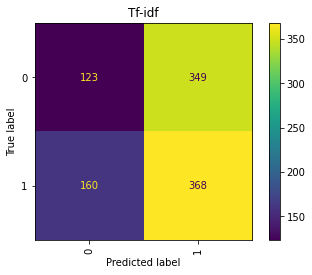

In [62]:
cm = confusion_matrix(Y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('Tf-idf')
plt.show()

# Modelisation: Naive Bayes sur une cible binaire

## CountVectorize

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [63]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df['stemm'],df_y, test_size=0.3, random_state=27)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([" ".join(words) for words in X_train2])
X2 = vectorizer.transform([" ".join(words) for words in X_test2]) 
vectorizer.get_feature_names_out()

array(['____', '__luyg', '_anetteolzonjpg', ..., 'œiller', 'œuf', 'œuvr'],
      dtype=object)

### BernoulliNB

In [65]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [67]:
X

<7000x17672 sparse matrix of type '<class 'numpy.int64'>'
	with 329974 stored elements in Compressed Sparse Row format>

In [69]:
Y_train2 = np.array(Y_train2, dtype=int)

In [76]:
clfb = BernoulliNB()
clfb.fit(X, Y_train2)

ypred = np.array(clfb.predict(X2), dtype=int)
Y_test2 = np.array(Y_test2, dtype=int)

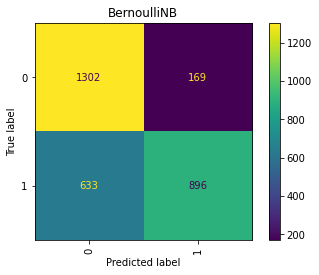

In [77]:
cm = confusion_matrix(Y_test2, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('BernoulliNB')
plt.show()

In [78]:
metrics.accuracy_score(Y_test2, ypred)

0.7326666666666667

## MultinomialNB

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [79]:
clfm = MultinomialNB()
clfm.fit(X, Y_train2)

print(clfm.predict(X2))

[0 1 1 ... 0 1 1]


In [80]:
ypred2 = clfm.predict(X2)

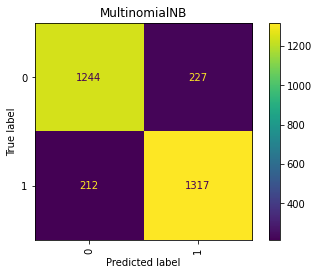

In [81]:
cm = confusion_matrix(Y_test2, ypred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('MultinomialNB')
plt.show()

In [82]:
metrics.accuracy_score(Y_test2, ypred2)

0.8536666666666667

## GaussianNB

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [83]:
clfg = GaussianNB()
clfg.fit(X.toarray(), Y_train2)

GaussianNB()

In [84]:
ypred3 = clfg.predict(X2.toarray())

In [85]:
X.shape

(7000, 17672)

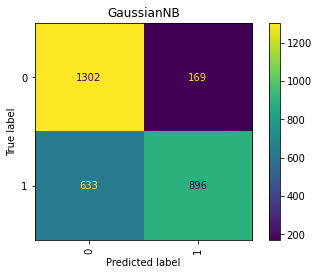

In [86]:
cm = confusion_matrix(Y_test2, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('GaussianNB')
plt.show()

In [87]:
metrics.accuracy_score(Y_test2, ypred)

0.7326666666666667


nous obtenons les mêmes résultats que pour le Bernoulli.


# Deployement du model avec FastApi et docker